## Analyzing data using Python

###  Import libraries

In [1]:
# !pip install seaborn

In [51]:
# !pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load and read data from local disk

Source: https://www.kaggle.com/ionaskel/laptop-prices#laptops.csv

In [25]:
laptop_data = pd.read_csv('./datasets/laptops.csv', encoding='ISO-8859-1', index_col=0)

laptop_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
laptop_data.shape

(1303, 12)

In [5]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 132.3+ KB


In [6]:
# Ckeck null values
laptop_data.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
laptop_data.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [26]:
# remove irrelevant columns for prediction
laptop_data.drop(['Product', 
                  'ScreenResolution', 
                  'Cpu', 
                  'Memory', 
                  'Gpu', 
                  'Weight'], inplace=True, axis=1)

In [27]:
laptop_data.sample(10)

,Company,TypeName,Inches,Ram,OpSys,Price_euros
416,Lenovo,Notebook,11.6,2GB,Windows 10,304.45
311,HP,2 in 1 Convertible,13.3,16GB,Windows 10,1975.00
1044,HP,Notebook,14.0,4GB,Windows 10,973.00
369,HP,Notebook,15.6,8GB,Windows 10,639.00
211,Dell,Ultrabook,13.3,8GB,Windows 10,1949.00
698,Acer,Notebook,14.0,4GB,Chrome OS,375.00
847,Lenovo,Notebook,14.0,4GB,Chrome OS,325.00
106,HP,Ultrabook,13.3,8GB,Windows 10,1119.00
1265,Asus,Gaming,15.6,16GB,Windows 10,2325.00
589,HP,Notebook,13.3,4GB,Windows 10,719.00


In [28]:
laptop_data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [29]:
laptop_data.TypeName.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [12]:
laptop_data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [13]:
laptop_data.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

### 2. Visualization

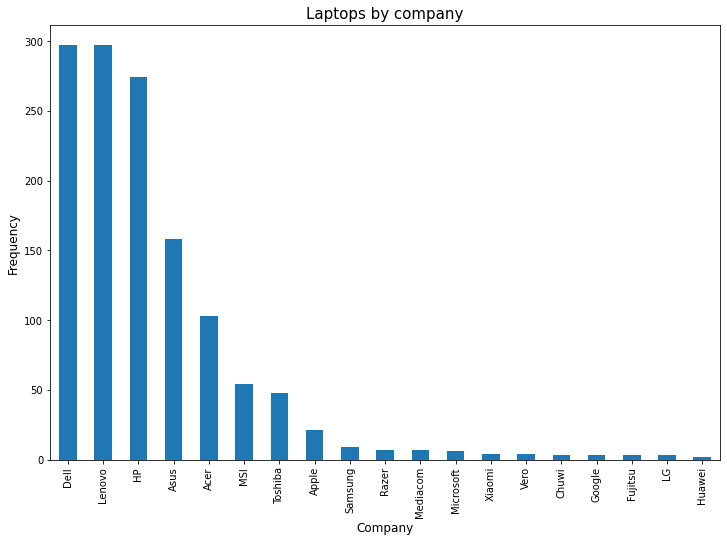

In [14]:
plt.figure(figsize=(12, 8))

laptop_data['Company'].value_counts().plot(kind='bar')

plt.title('Laptops by company', fontsize=15)

plt.xlabel('Company', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

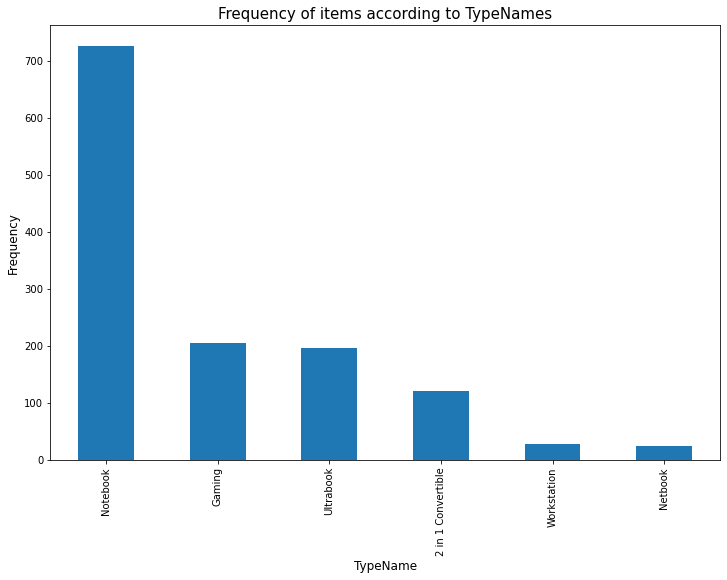

In [15]:
plt.figure(figsize=(12, 8))

laptop_data['TypeName'].value_counts().plot(kind='bar')

plt.title('Frequency of items according to TypeNames', fontsize=15)
plt.xlabel('TypeName', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<AxesSubplot:>

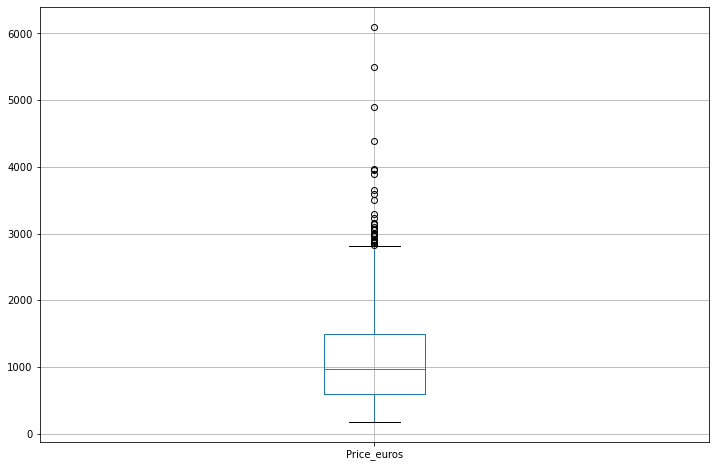

In [16]:
plt.figure(figsize=(12, 8))

laptop_data[['Price_euros']].boxplot()

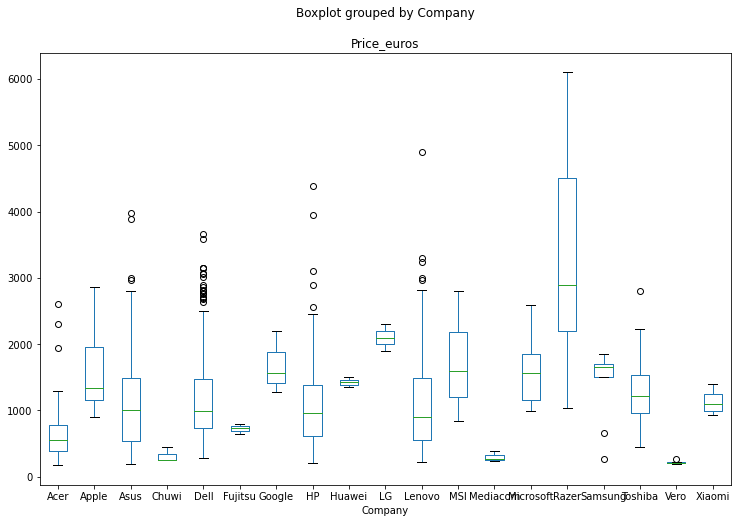

In [17]:
laptop_data.boxplot(by = 'Company', column = ['Price_euros'],
                    grid = False, figsize=(12, 8))

plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


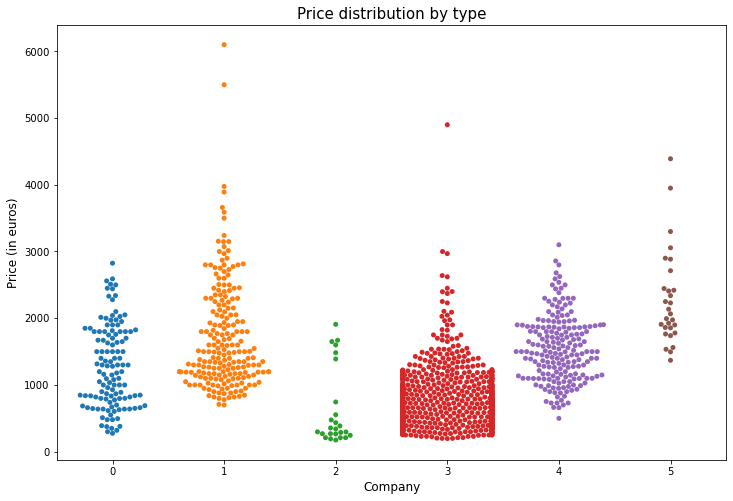

In [22]:
plt.figure(figsize=(12, 8))

sns.swarmplot(x='TypeName', y='Price_euros', data=laptop_data)

plt.title('Price distribution by type', fontsize=15)

plt.xlabel('Company', fontsize=12)
plt.ylabel('Price (in euros)', fontsize=12)
plt.show()

### 3. Prediction Price Laptop

In [34]:
from sklearn.preprocessing import LabelEncoder
# Encode values to number 
label_encoder = LabelEncoder()

laptop_data['TypeName'] = label_encoder.fit_transform(laptop_data['TypeName'])

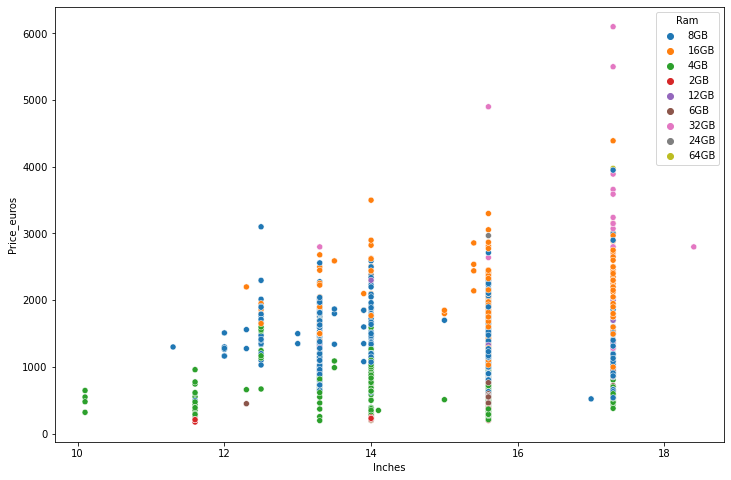

In [35]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='Inches', y='Price_euros', hue='Ram', data=laptop_data)

plt.show()

In [30]:
laptop_data.head()

,Company,TypeName,Inches,Ram,OpSys,Price_euros
1,Apple,Ultrabook,13.3,8GB,macOS,1339.69
2,Apple,Ultrabook,13.3,8GB,macOS,898.94
3,HP,Notebook,15.6,8GB,No OS,575.00
4,Apple,Ultrabook,15.4,16GB,macOS,2537.45
5,Apple,Ultrabook,13.3,8GB,macOS,1803.60


In [36]:
# encode categorical values to 0 and 1 for machine learning
dummy_laptop_data = pd.get_dummies(laptop_data)

dummy_laptop_data.head()

,TypeName,Inches,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Ram_8GB,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
1,4,13.3,1339.69,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,4,13.3,898.94,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,15.6,575.00,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,4,15.4,2537.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,4,13.3,1803.60,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [34]:
dummy_laptop_data.shape

(1303, 40)

In [37]:
# remove column price
X = dummy_laptop_data.drop('Price_euros', axis=1)

y = dummy_laptop_data['Price_euros']

#### 3.1. Split df into train/test dataset 

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
X_train.shape, X_test.shape

((1042, 39), (261, 39))

In [40]:
y_train.shape, y_test.shape

((1042,), (261,))

#### 3.2. Using LinearRegression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression()

In [42]:
# Model Valuation
linear_regression.score(X_train, y_train)

0.6870920413464341

In [43]:
y_pred = linear_regression.predict(X_test)

r2_score(y_test, y_pred)

0.6019124617196214

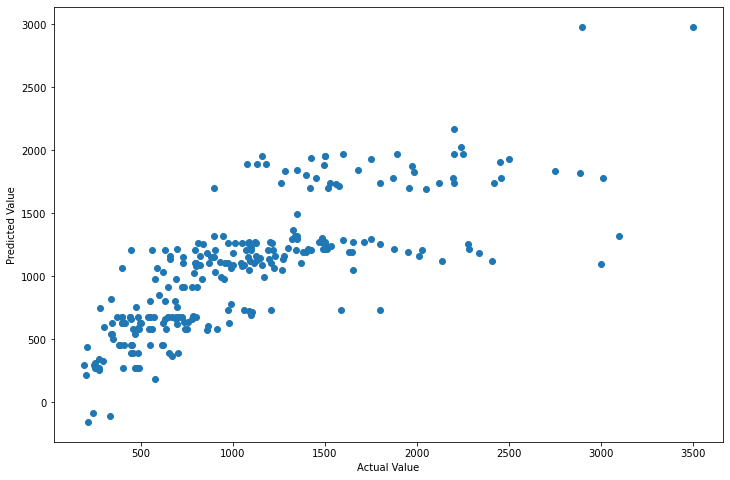

In [44]:
# Visualization Actual & Predict Value
plt.figure(figsize = (12, 8))

plt.scatter(y_test, y_pred)

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

plt.show()